# Chapter07 선형회귀 기초
데이터 과학을 위한 파이썬 머신러닝

- <a href="#Scikit-learn">Scikit-learn</a>
- <a href="#07.1선형회귀이해">07.1 선형회귀 이해</a>
- <a href="#07.2선형회귀기초수식">07.2 선형회귀 기초 수식</a>
- <a href="#07.3최소자승법으로선형회귀풀기">07.3 최소자승법으로 선형회귀 풀기</a>
- <a href="#07.4경사하강법으로선형회귀풀기">07.4 경사하강법으로 선형회귀 풀기</a>
- <a href="#07.5선형회귀성능측정하기">07.5 선형회귀 성능 측정하기</a>
- <a href="#07.6코드로선형회귀구현하기">07.6 코드로 선형회귀 구현하기</a>

------------------

## <a name="Scikit-learn">Scikit-learn</a>

### 라이브러리 사용

In [ ]:
!pip install scikit-learn

In [ ]:
import sklearn
sklearn.show_versions()

### Scikit-learn API 사용 예제
- 단순 선형 회귀

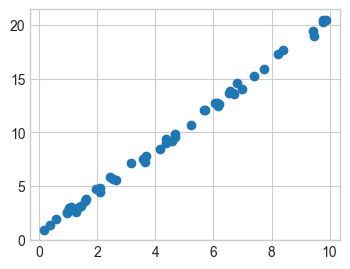

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use(['seaborn-whitegrid'])
plt.rcParams['figure.figsize'] =(4, 3)

x = 10 * np.random.rand(50)           # 임의의 x값 50개
y = 2 * x + np.random.rand(50)        # y = 2x + b

plt.scatter(x, y)
plt.show()

In [8]:
# 1. 적절한 estimator 클래스를 임포트해서 모델의 클래스 선택
from sklearn.linear_model import LinearRegression

# 2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택
model = LinearRegression(fit_intercept=True)
model

# 3. 데이터를 특징 배열과 대상 벡터로 배치
X = x[:, np.newaxis]   # 1차원 -> 2차원으로 차원 증가시키기 (np.newaxis)
X

array([[1.43353287],
       [9.44668917],
       [5.21848322],
       [4.1466194 ],
       [2.64555612],
       [7.74233689],
       [4.56150332],
       [5.68433949],
       [0.187898  ],
       [6.17635497],
       [6.12095723],
       [6.16933997],
       [9.43748079],
       [6.81820299],
       [3.59507901],
       [4.37031954],
       [6.97631196],
       [0.60225472],
       [6.66766715],
       [6.7063787 ],
       [2.10382561],
       [1.28926298],
       [3.15428351],
       [3.63710771],
       [5.7019677 ],
       [4.38601513],
       [9.88373838],
       [1.02044811],
       [2.08876756],
       [1.61309518],
       [6.53108325],
       [2.53291603],
       [4.66310773],
       [2.44425592],
       [1.58969584],
       [1.10375141],
       [6.56329589],
       [1.38182951],
       [1.96582362],
       [3.68725171],
       [8.2099323 ],
       [0.97101276],
       [8.37944907],
       [0.96098408],
       [9.76459465],
       [4.68651202],
       [9.76761088],
       [6.048

In [9]:
# 4. 모델 인스턴스의 fit() 메서드를 호출해 모델을 데이터에 적합
model.fit(X, y)

print(f'선형 회귀 모델의 계수(weight) : {model.coef_}')      # 선형 회귀 모형의 계수(weight)
print(f'선형 회귀 모델의 절편(bias)   : {model.intercept_}') # 선형 회귀 모형의 절편(bias)

선형 회귀 모델의 계수(weight) : [2.0033801]
선형 회귀 모델의 절편(bias)   : 0.48879786072018305


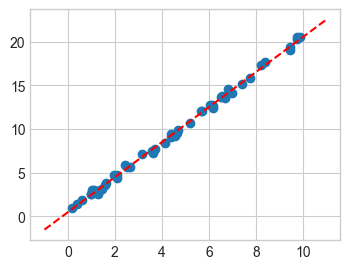

In [7]:
# 5. 모델을 새 데이터에 대해서 적용
xfit = np.linspace(-1, 11)   # -1 ~ 11 사이 균등분할 값 50개(default 50개)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit, '--r');
plt.show()

### [실습] 키로 몸무게 추정하는 단순 선형회귀 모델
- 167cm 남학생의 몸무게는?
- 167cm 여학생의 몸무게는? 

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1. 데이터 준비
df = pd.read_excel('./data/키와몸무게.xlsx')
df

# 2. 학습모델 선정
model = LinearRegression()  # 선형회귀모델

# 3. 하이퍼파라미터

# 4. 학습
X = df[['키','구분']]  # 구분: 남자 0, 여자 1
Y = df.몸무게
model.fit(X.values, Y)  # X 대신 X.values (warnings.warn 메시지 안나오게 하려면)

# 5. 검증
# y = ax + b
coef = model.coef_               # 직선의 기울기(a)
intercept = model.intercept_     # 직선의 절편(b)
score = model.score(X, Y)        # 추정된 회귀직선의 정확도(결정계수 r2)
print(f"선형회귀직선: y = {coef[0]:.2f}x + {intercept: .2f}")
print(f"선형회귀직선의 관계점수(R2): {score: .2f}")
print(f"167cm 남학생 추정 몸무게: {model.predict([[167,0]])}")
print(f"167cm 여학생 추정 몸무게: {model.predict([[167,1]])}")
print(f"167cm 남학생, 여학생의 추정 몸무게: {model.predict([[167,0], [167,1]])}")

선형회귀직선: y = 0.75x + -61.23
선형회귀직선의 관계점수(R2):  0.84
167cm 남학생 추정 몸무게: [63.69388959]
167cm 여학생 추정 몸무게: [56.46358918]
167cm 남학생, 여학생의 추정 몸무게: [63.69388959 56.46358918]


### Scikit-learn 내장 Dataset 사용 예제
#### 내장 데이터셋 구조
- 일반적으로 딕셔너리 형태로 구성
- data: 특징 데이터 세트
- target: 분류용은 레이블 값, 회귀용은 숫자 결과값 데이터
- target_names: 개별 레이블의 이름 (분류용)
- feature_names: 특징 이름
- DESCR: 데이터 세트에 대한 설명과 각 특징 설명

In [ ]:
from sklearn.datasets import load_diabetes
df = load_diabetes()
print(df.keys())
# print(df.data)
# print(df.target)
# print(df.DESCR)
print(df.feature_names)
print(df.data_filename)
print(df.target_filename)

-----

## <a name="07.1선형회귀이해">07.1 선형회귀 이해</a>

### 1. 선형회귀의 개념
- 선형회귀(Linear Regression) : 종속변수 $y$ 와 한 개 이상의 독립변수  $x$ 와의 선형 상관관계를 모델링하는 회귀분석 기법
- 기존 데이터를 활용해 연속형 변수값을 예측
- $y=ax+b$꼴의 수식을 만들고 a와 b의 값을 찾아냄

### 2. 예측 함수와 실제값 간의 차이
- 예측 함수는 예측값과 실제값 간의 차이를 최소화하는 방향으로
- 데이터 n개 중 i번째 데이터의 값에 대한 실제값과 예측값의 차이 : $\hat{y^i} - y^i$
- 데이터가 5개 있을 때 5개 데이터의 오차의 합
 - - $(\hat{y^1} - y^1) + (\hat{y^2} - y^2) + (\hat{y^3} - y^3) + (\hat{y^4} - y^4) + (\hat{y^5} - y^5)$
 - - 오차 값들이 음수와 양수로 나왔을 때 값들 간의 차이가 상쇄되어 0으로 계산될 수 있음 <br><br>
- 값의 제곱을 사용하여 오차의 합을 표현: square error
 - - $(\hat{y^1} - y^1)^2 + (\hat{y^2} - y^2)^2 + (\hat{y^3} - y^3)^2 + (\hat{y^4} - y^4)^2 + (\hat{y^5} - y^5)^2 = \sum_{i=1}^n (\hat{y^i} - y^i)^2 $ <br><br>
- 제곱 오차를 최소화하는 $w_0$ 와 $w_1$ 을 찾아야 함
 - - $\sum_{i=1}^n (w_i x^i + w_0$ x $1 - y^i)^2 $

----------------

## <a name="07.2선형회귀기초수식">07.2 선형회귀 기초 수식</a>

### 1. 비용함수의 개념

w:-3.0, cost:74.66666666666667
w:-2.9, cost:70.98
w:-2.8, cost:67.38666666666666
w:-2.7, cost:63.88666666666668
w:-2.6, cost:60.48000000000001
w:-2.5, cost:57.166666666666664
w:-2.4, cost:53.94666666666666
w:-2.3, cost:50.81999999999999
w:-2.2, cost:47.78666666666668
w:-2.1, cost:44.84666666666667
w:-2.0, cost:42.0
w:-1.9, cost:39.24666666666666
w:-1.8, cost:36.586666666666666
w:-1.7, cost:34.02
w:-1.6, cost:31.54666666666667
w:-1.5, cost:29.166666666666668
w:-1.4, cost:26.879999999999995
w:-1.3, cost:24.686666666666667
w:-1.2, cost:22.586666666666662
w:-1.1, cost:20.580000000000002
w:-1.0, cost:18.666666666666668
w:-0.9, cost:16.846666666666668
w:-0.8, cost:15.120000000000003
w:-0.7, cost:13.486666666666665
w:-0.6, cost:11.946666666666667
w:-0.5, cost:10.5
w:-0.4, cost:9.146666666666667
w:-0.3, cost:7.886666666666667
w:-0.2, cost:6.72
w:-0.1, cost:5.646666666666666
w:0.0, cost:4.666666666666667
w:0.1, cost:3.7800000000000007
w:0.2, cost:2.986666666666667
w:0.3, cost:2.2866666666666666

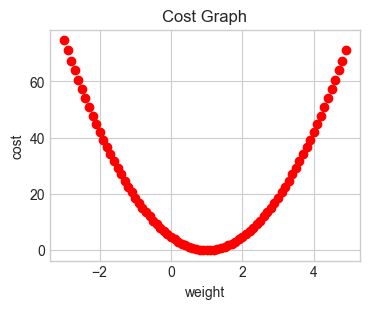

In [13]:
# 비용함수 및 그래프 시각화
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def cost(x, y, w):  # 비용 함수: 평균 제곱 오차(MSE : Mean Squared Error) 
    c = 0
    for i in range(len(x)):
        hx = w * x[i]          # 머신러닝 예측 방정식
        loss = (hx - y[i])**2  # (예측값 - 실제값)^2
        c += loss
        
    return c/len(x)


#------------------------------
# x축(weight), y축(cost)으로 하는 2차 함수: 포물선의 방정식
#------------------------------
x = [1,2,3]    #입력값, 독립변수
y = [1,2,3]    #종속변수, target

for i in range(-30,50):
    w = i/10
    c = cost(x, y, w)
    print(f'w:{w}, cost:{cost(x,y,w)}')
    plt.plot(w,c,'ro')  # 'r':red, 'o': 점으로 출력 
    
plt.title('Cost Graph')    
plt.xlabel('weight')
plt.ylabel('cost')
plt.grid(True)

plt.show()  

### 2. 비용함수의 편미분

---------

## <a name="07.3최소자승법으로선형회귀풀기">07.3 최소자승법으로 선형회귀 풀기</a>

### 1. 최소자승법으로 풀기
- 최소자승법(least square method) : 선형대수의 표기법을 사용하여 방정식으로 선형회귀 문제를 푸는 방법


### 2. 최소자승법의 활용
- 사이킷런의  LinearRegression() = Ordinary least squares Linear Regression.
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

-----

## <a name="07.4경사하강법으로선형회귀풀기">07.4 경사하강법으로 선형회귀 풀기</a>

### 1. 경사하강법의 개념
- 경사하강법(gradient descent) : 경사를 하강하면서 수식을 최소화하는 매개변수의 값을 찾아내는 방법
- 점이 최솟값을 달성하는 방향으로 점점 내려감
- 몇 번 적용할 것인가? : 많이 실행할수록 최솟값에 가까워짐
- 한 번에 얼마나 많이 내려갈 것인가? : 한 번에 얼마나 많은 공간을 움직일지를 기울기, 즉 경사라고 부름
- 경사(gradient) : 경사하강법의 하이퍼 매개변수

### 2. 경사하강법 알고리즘


- 경사하강법의 기본 수식
- $x_{new} = x_{old} - \alpha$ x $(2x_{old})$
- $x_{old}$ : 현재의 $x값$
- $x_{new}$ : 경사 값이 적용된 후 생성된 값

#### 경사하강법을 코드로 표현

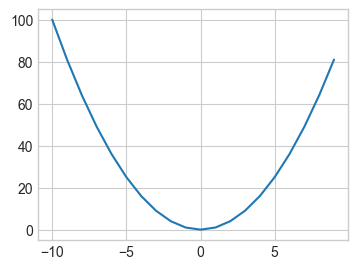

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 1)
fx = x ** 2

plt.plot(x, fx)
plt.show()

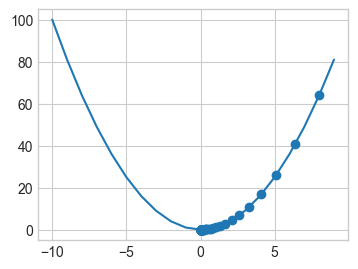

In [15]:
x_new = 10      
derivative = []
y = []
learng_rate= 0.1
for i in range(100):
    old_value = x_new
    derivative.append(old_value - learng_rate * 2 * old_value)
    x_new = old_value - learng_rate *2* old_value
    y.append(x_new ** 2)
plt.plot(x, fx)
plt.scatter(derivative, y)
plt.show()

#### 경사하강법에서 개발자가 결정해야 할 것
- **학습률(learning rate)을 얼마로 할 것인가? α 값을 결정**
 1. 반복이 수행될 때마다 최솟값 변화
 1. 값이 너무 작으면 충분히 많은 반복을 적용해도 원하는 최적값을 찾지 못하는 경우 발생
 1. 값이 너무 크면 발산하여 최솟값 수렴 않거나 시간이 너무 오래 걸림

- **얼마나 많은 반복(iteration)으로 돌릴 것인가?**
 1. 반복 횟수가 충분하지 않다면 최솟값을 찾지 못하는 경우 발생
 1. 반복 횟수가 너무 많다면 필요 없는 시간을 허비할 수도 있음

### 3. 경사하강법으로 선형회귀 풀기


- learning_rate : 경사 하강법에서 반복적으로 조금씩 최소값에 접근할 때 변화되는 변수 x의 양
- epoch :  전체 데이터를 모두 넣어서 에러를 구하는 것을 1 에폭이라고 한다.

w= 0.63, b=-1.65
선형회귀직선: y = 0.63x + -1.65


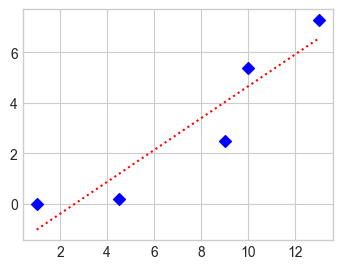

In [16]:
X = np.array([1, 4.5, 9, 10, 13])
Y = np.array([0, 0.2, 2.5, 5.4, 7.3])

# 직접계산하여 
w, b = 0, 0   # y = wx + b 의 초기값
learning_rate, epoch = 0.005, 1000  # 학습률과 학습 횟수
for i in range(epoch):
    y_pred = w*X + b      # 추정 선형회귀직선 식
    error = y_pred - Y    # 성능척도: 잔차
    w = w - learning_rate * (error * X).sum()    
    b = b - learning_rate * error.sum()
    
print(f'w={w: .2f}, b={b: .2f}')
print(f"선형회귀직선: y = {w:.2f}x + {b: .2f}")

    
# 산점도 + 추정회귀직선
plt.scatter(X, Y, color='blue', marker='D')
y_pred = w*X + b
plt.plot(X, y_pred, 'r:')
plt.show()

-----

## <a name="07.5선형회귀성능측정하기">07.5 선형회귀 성능 측정하기</a>

### 1. 훈련/테스트 분할
- 훈련/테스트 분할(train/test split) : 머신러닝에서 데이터를 학습을 하기 위한 학습 데이터셋(train dataset)과 학습의 결과로 생성된 모델의 성능을 평가하기 위한 테스트 데이터셋(test dataset)으로 나눔
- 모델이 새로운 데이터셋에도 일반화(generalize)하여 처리할 수 있는지를 확인

### 2. 선형회귀의 성능 측정 지표
#### 2.1.MAE(Mean Absolute Error) 
- MAE(Mean Absolute Error) : 평균 절대 잔차
- 모든 테스트 데이터에 대해 예측값과 실제값의 차이에 대해 절댓값을 구하고, 이 값을 모두 더한 후에 데이터의 개수만큼 나눈 결과
- 직관적으로 예측값과 실측값의 차이를 알 수 있음
- sklearn 모듈에서는 median_absolute_error 함수로 MAE를 구함
- 값이 작을 수록 좋다

#### 2.2.RMSE(Root Mean Squared Error)
- RMSE(Root Mean Squared Error) : 평균제곱근 오차
- 오차에 대해 제곱을 한 다음 모든 값을 더하여 평균을 낸 후 제곱근을 구함
- MAE에 비해 상대적으로 값의 차이가 더 큼
- 차이가 크게 나는 값에 대해서 페널티를 주고 싶다면 RMSE 값을 사용
- sklearn 모듈에서 RMSE를 직접적으로 지원하지는 않고 mean_squared_error만 지원
- 값이 작을 수록 좋다

#### 2.3 결정계수
- 결정계수(R-squared) : 두 개의 값의 증감이 얼마나 일관성을 가지는지 나타내는 지표
- 예측값이 크면 클수록 실제값도 커지고, 예측값이 작으면 실제값도 작아짐
- 두 개의 모델 중 어떤 모델이 조금 더 상관성이 있는지를 나타낼 수 있지만, 값의 차이 정도가 얼마인지는 나타낼 수 없다는 한계가 있음
- sklearn 모듈에서 r2_score 사용
- 1에 가까울 수록 좋다

-------

## <a name="07.6코드로선형회귀구현하기">07.6 코드로 선형회귀 구현하기</a>

### 경사하강법을 선형회귀로 구현
- 데이터 생성

- 생성된 데이터에 경사하강법 적용


----

THE END